# Interactive EEG dataset annotation 

In [2]:
import os
import pandas as pd
import numpy as np
import mne
import bbtools as bbt
from datetime import timedelta

%matplotlib notebook

Read the file and identify the channels used:

In [3]:
eeg_file = "./data/4-artifacts-blink-jaw-eyesleft-eyesright-1-min-sequences-BBT-E16-AAA005-2019-11-29_18-22-04/EEG.csv"
electrodes_used = ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz']
#electrodes_used = ["Fp1", "Fp2", "Af3", "Af4", "C3", "C1", "C2", "C4", "Cp3", "Cp1", "Cp2", "Cp4", "P7", "01", "02", "P8"]
raw = bbt.read_csv(eeg_file, electrodes_used)

Creating RawArray with float64 data, n_channels=16, n_times=65200
    Range : 0 ... 65199 =      0.000 ...   254.684 secs
Ready.
DigMontage is a superset of info. 78 in DigMontage will be ignored. The ignored channels are: {'AF3', 'TP10', 'F6', 'FC3', 'FT10', 'PO3', 'FC6', 'P9', 'PO7', 'C6', 'P10', 'T4', 'C5', 'CP5', 'T3', 'AF6', 'FT7', 'AF5', 'P2', 'O10', 'TP8', 'T6', 'F8', 'M1', 'FCz', 'Iz', 'F5', 'P5', 'A2', 'T7', 'AFz', 'A1', 'T9', 'P6', 'PO4', 'F9', 'TP9', 'PO6', 'O9', 'PO10', 'PO1', 'T5', 'AF1', 'FT8', 'FC4', 'F2', 'FC1', 'TP7', 'T10', 'F10', 'F7', 'PO5', 'FC5', 'POz', 'AF10', 'M2', 'F1', 'Oz', 'FT9', 'Fpz', 'PO8', 'AF7', 'Fz', 'P1', 'CPz', 'P3', 'FC2', 'AF2', 'P7', 'P8', 'CP6', 'P4', 'AF8', 'T8', 'PO2', 'AF9', 'PO9', 'AF4'}


Let's check what it looks like:

In [4]:
print(raw.info)

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F3, F4, C1, C3, C2, C4, CP1, ...
    chs : list | 16 items (EEG: 16)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 19 items (3 Cardinal, 16 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 16
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneTyp

<IPython.core.display.Javascript object>


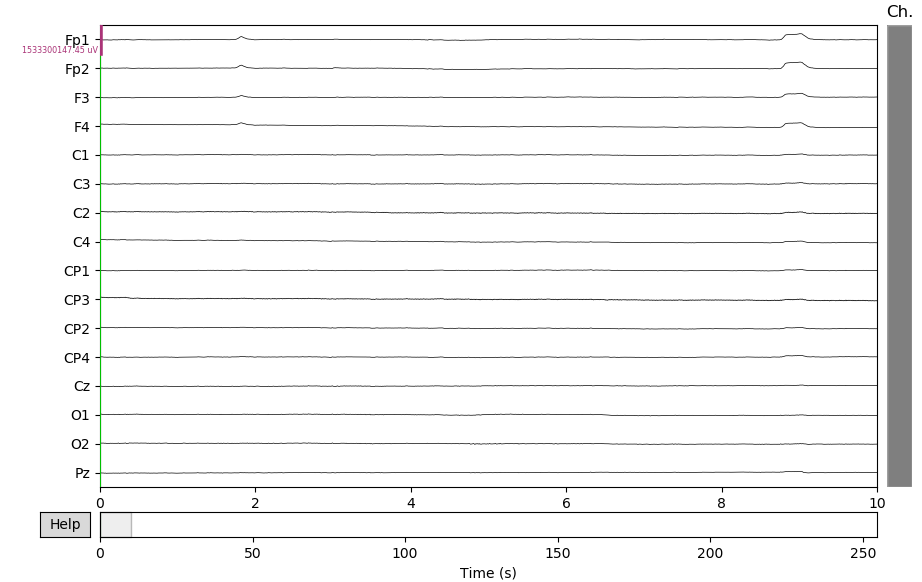

In [5]:
plot_fig = raw.plot(scalings='auto')

Now it's time to build an Anotations data structure. For more details on this type of structure check https://mne.tools/dev/generated/mne.Annotations.html#mne.annotations
Note: orig_time is in UTC format, it shall be ignored when analysing the raw data and annotations and take into account that both start at 0 (only reading the seconds)

In [6]:
annotations = mne.Annotations(onset= [0, 0, 0, 0],
                              duration = [0, 0, 0, 0],
                              description=['Blink', 'Mordida', 'Left', 'Right'],
                              orig_time = raw.info['meas_date'])
print(annotations)

<Annotations  |  4 segments : Blink (1), Mordida (1), Left (1)..., orig_time : None>


In [7]:
raw2 = raw.copy()

<IPython.core.display.Javascript object>


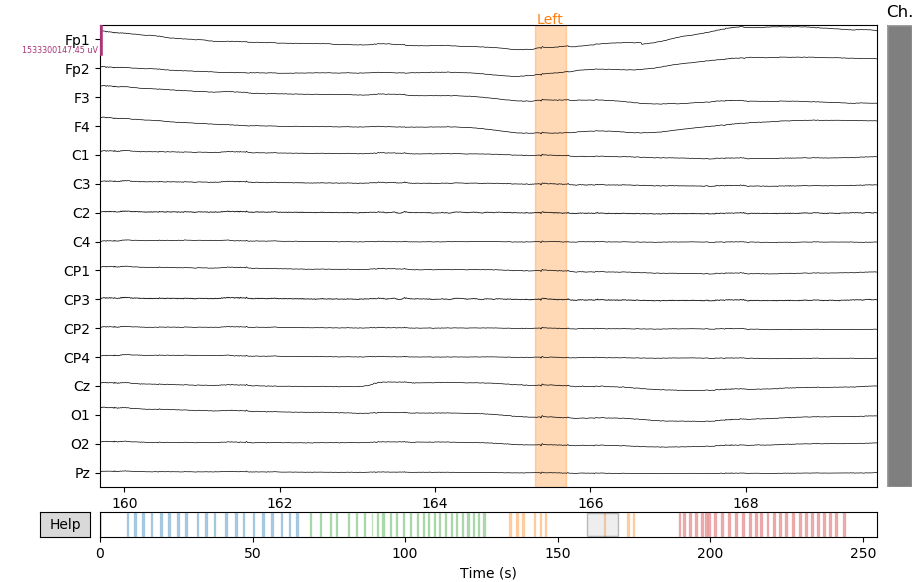

<IPython.core.display.Javascript object>


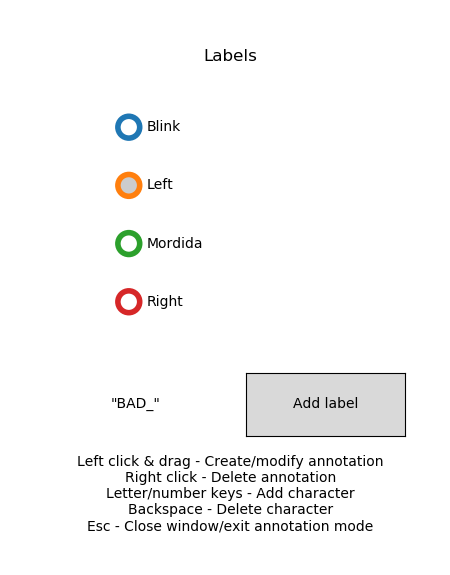

In [8]:
raw2.set_annotations(annotations)
#fig = raw2.plot(scalings='auto', butterfly=True, group_by='position')
fig = raw2.plot(scalings='auto')
fig.canvas.key_press_event('a')

Calling set_annotations() replaces any annotations currently stored in the Raw object. A good safeguard is to run interactive_annot = raw.annotations after you finish an interactive annotation session, so that the annotations are stored in a separate variable outside the Raw object.

In [9]:
interactive_annot = raw2.annotations

In [10]:
print(interactive_annot)

<Annotations  |  88 segments : Blink (21), Mordida (28), Left (10)..., orig_time : None>


In [12]:
print(raw2.annotations[0, 1]) 

<Annotations  |  2 segments : Blink (1), Mordida (1), orig_time : None>


In [13]:
raw2.annotations.save('./data/4-artifacts-blink-jaw-eyesleft-eyesright-1-min-sequences-BBT-E16-AAA005-2019-11-29_18-22-04/interactive-annotations.csv')